# Analysis of Crime Data in Cuyahoga County

In [2]:
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

import numpy as np
from scipy.stats import linregress

from api_keys import weather_api_key
from api_keys import fbi_key



In [3]:
crime_2017 = pd.read_csv("ocjs_crimebycounty2017.csv")
crime_2017.head()

FileNotFoundError: [Errno 2] File b'ocjs_crimebycounty2017.csv' does not exist: b'ocjs_crimebycounty2017.csv'

In [4]:
cuy_crime=crime_2017.loc[153:199, :].reset_index(drop=True)
cuy_crime.head()

NameError: name 'crime_2017' is not defined

In [5]:
cuy_crime_null=cuy_crime.fillna(0)
cuy_crime_null.head()

NameError: name 'cuy_crime' is not defined

In [6]:
cuy_data=cuy_crime_null.drop(cuy_crime_null[cuy_crime_null["POPULATION"]==0].index).reset_index(drop=True)
cuy_data.head()

NameError: name 'cuy_crime_null' is not defined

In [7]:
#Summary of cuy_data_df
cuy_data.info()

NameError: name 'cuy_data' is not defined

In [8]:
#df.replace(',','', regex=True, inplace=True)
#Remove commas from numerical values to change values to integers
cuy_data.replace(',','', regex=True, inplace=True)
cuy_data.head()

#Option 1:  df["a"] = df["a"].astype(str).astype(int)
#Option 2:  cuy_data["POPULATION"] = cuy_data["POPULATION"].astype(str).astype(int)
#Option 3:  pd.to_numeric(s, errors='coerce')
cuy_data["POPULATION"]=pd.to_numeric(cuy_data["POPULATION"])
cuy_data["VIOLENT CRIME"]=pd.to_numeric(cuy_data["VIOLENT CRIME"])
cuy_data["PROPERTY CRIME"]=pd.to_numeric(cuy_data["PROPERTY CRIME"])
cuy_data["MURDER"]=pd.to_numeric(cuy_data["MURDER"])
cuy_data["RAPE"]=pd.to_numeric(cuy_data["RAPE"])
cuy_data["ROBBERY"]=pd.to_numeric(cuy_data["ROBBERY"])
cuy_data["AGGRAVATED ASSAULT"]=pd.to_numeric(cuy_data["AGGRAVATED ASSAULT"])
cuy_data["BURGLARY"]=pd.to_numeric(cuy_data["BURGLARY"])
cuy_data["LARCENY"]=pd.to_numeric(cuy_data["LARCENY"])
cuy_data["MTR VEHICLE THEFT"]=pd.to_numeric(cuy_data["MTR VEHICLE THEFT"])
cuy_data["ARSON"]=pd.to_numeric(cuy_data["ARSON"])
#Summary of cuy_data_df
cuy_data.info()

NameError: name 'cuy_data' is not defined

In [9]:
cuy_data['TOTALS'] = cuy_data.drop('POPULATION', axis=1).sum(axis=1)
cuy_data.head()

NameError: name 'cuy_data' is not defined

In [10]:
#Pie chart of totals
plot = cuy_data.plot.pie(y='TOTALS')

NameError: name 'cuy_data' is not defined

In [11]:
cuy_data.plot.bar(x="AGENCY NAME", y="POPULATION")
cuy_data.plot.bar(x="AGENCY NAME", y="VIOLENT CRIME")

NameError: name 'cuy_data' is not defined

In [12]:
asian=[]
black=[]
amer_ind=[]
white=[]
unknown=[]

In [13]:
#Get Violent crime data for Cle 2017
url_race=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/violent-crime/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_race).json()

In [14]:
#Get Asian count for violent crime in Cle
asian.append(response["data"][13]["value"])

In [15]:
#Get Black or African American count for violent crime in Cle
black.append(response["data"][43]["value"])

In [16]:
#Get American Indian count for violent crime in Cle
amer_ind.append(response["data"][58]["value"])

In [17]:
#Get White count for violent crime in Cle
white.append(response["data"][73]["value"])

In [18]:
#Get Unknown count for violent crime in Cle
unknown.append(response["data"][88]["value"])

In [19]:
#Get 2017 Property Crime data for Cle
url_property=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/property-crime/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_property).json()

In [20]:
#Get Asian count for property crime in Cle 
asian.append(response["data"][13]["value"])

In [21]:
#Get Black or African American count for property crime in Cle
black.append(response["data"][43]["value"])

In [22]:
#Get American Indian count for property crime in Cle
amer_ind.append(response["data"][58]["value"])

In [23]:
#Get White count for property crime in Cle
white.append(response["data"][73]["value"])

In [24]:
#Get Unknown count for property crime in Cle
unknown.append(response["data"][88]["value"])

In [25]:
#Get 2017 Homicide data for Cle
url_homicide=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/homicide/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_homicide).json()

In [26]:
#Get Asian count for homicide crime in Cle 
asian.append(response["data"][13]["value"])


In [27]:
#Get Black or African American count for homicide crime in Cle
black.append(response["data"][43]["value"])

In [28]:
#Get American Indian count for homicide crime in Cle
amer_ind.append(response["data"][58]["value"])

In [29]:
#Get White count for homicide crime in Cle
white.append(response["data"][73]["value"])

In [30]:
#Get Unknown count for homicide crime in Cle
unknown.append(response["data"][88]["value"])

In [31]:
#Get Rape data for Cle 2017
url_rape=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/rape/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_rape).json()


In [32]:
#Get Asian count for rape crime in Cle 
asian.append(response["data"][13]["value"])


In [33]:
#Get Black or African American count for rape crime in Cle
black.append(response["data"][43]["value"])

In [34]:
#Get American Indian count for rape crime in Cle
amer_ind.append(response["data"][58]["value"])


In [35]:
#Get White count for rape crime in Cle
white.append(response["data"][73]["value"])

In [36]:
#Get Unknown count for rape crime in Cle
unknown.append(response["data"][88]["value"])

In [37]:
#Get Robbery data for Cle 2017
url_robbery=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/robbery/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_robbery).json()

In [38]:
#Get Asian count for robbery crime in Cle 
asian.append(response["data"][13]["value"])


In [39]:
#Get Black or African American count for robbery crime in Cle
black.append(response["data"][43]["value"])

In [40]:
#Get American Indian count for robbery crime in Cle
amer_ind.append(response["data"][58]["value"])

In [41]:
#Get White count for robbery crime in Cle
white.append(response["data"][73]["value"])

In [42]:
#Get Unknown count for robbery crime in Cle
unknown.append(response["data"][88]["value"])

In [43]:
#Get Aggravated Assault data for Cle 2017
url_agg_assault=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/aggravated-assault/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_agg_assault).json()

In [44]:
#Get Asian count for aggravated assault crime in Cle 
asian.append(response["data"][13]["value"])


In [45]:
#Get Black or African American count for aggravated assault crime in Cle
black.append(response["data"][43]["value"])

In [46]:
#Get American Indian count for aggravated assault crime in Cle
amer_ind.append(response["data"][58]["value"])

In [47]:
#Get White count for aggravated assault crime in Cle
white.append(response["data"][73]["value"])

In [48]:
#Get Unknown count for aggravated assault crime in Cle
unknown.append(response["data"][88]["value"])

In [49]:
#Get Arson data for Cle 2017
url_arson=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/arson/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_arson).json()

In [50]:
#Get Asian count for arson crime in Cle 
asian.append(response["data"][13]["value"])


In [51]:
#Get Black or African American count for arson crime in Cle
black.append(response["data"][43]["value"])


In [52]:
#Get American Indian count for arson crime in Cle
amer_ind.append(response["data"][58]["value"])

In [53]:
#Get White count for arson crime in Cle
white.append(response["data"][73]["value"])

In [54]:
#Get Unknown count for arson crime in Cle
unknown.append(response["data"][88]["value"])

In [55]:
#Get Motor Vehicle Theft data for 2017
url_car=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/motor-vehicle-theft/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_car).json()

In [56]:
#Get Asian count for motor-vehicle-theft crime in Cle 
asian.append(response["data"][13]["value"])


In [57]:
#Get Black or African American count for motor-vehicle-theft crime in Cle
black.append(response["data"][43]["value"])

In [58]:
#Get American Indian count for motor-vehicle-theft crime in Cle
amer_ind.append(response["data"][58]["value"])


In [59]:
#Get White count for robbery motor-vehicle-theft in Cle
white.append(response["data"][73]["value"])

In [60]:
#Get Unknown count for robbery motor-vehicle-theft in Cle
unknown.append(response["data"][88]["value"])

In [61]:
#Get Burlary data for Cle 2017
url_burglary=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/burglary/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_burglary).json()

In [62]:
#Get Asian count for burglary crime in Cle 
asian.append(response["data"][13]["value"])

In [63]:
#Get Black or African American count for burglary crime in Cle
black.append(response["data"][43]["value"])

In [64]:
#Get American Indian count for burglary crime in Cle
amer_ind.append(response["data"][58]["value"])

In [65]:
#Get White count for burglary crime in Cle
white.append(response["data"][73]["value"])

In [66]:
#Get Unknown count for burglary crime in Cle
unknown.append(response["data"][88]["value"])

In [67]:
#Get Larceny data for Cle 2017
url_larceny=f"https://api.usa.gov/crime/fbi/sapi/api/nibrs/larceny/offender/agencies/OHCLP0000/race?api_key={fbi_key}"
response=requests.get(url_larceny).json()

In [68]:
#Get Asian count for larceny crime in Cle 
asian.append(response["data"][13]["value"])

In [69]:
#Get Black or African American count for larceny crime in Cle
black.append(response["data"][43]["value"])

In [70]:
#Get American Indian count for larceny crime in Cle
amer_ind.append(response["data"][58]["value"])

In [71]:
#Get White count for larceny crime in Cle
white.append(response["data"][73]["value"])

In [72]:
#Get Unknown count for larceny crime in Cle
unknown.append(response["data"][88]["value"])

In [73]:
#Make crime list for Race DataFrame
crimes=["Violent Crime", "Property Crime", "Homicide", "Rape", "Robbery", "Aggravated Assault",
       "Arson", "Motor Vehicle Theft", "Burglary", "Larceny"]

In [74]:
#Make Dataframe for Race Count
race_data= { "Crimes": crimes,
           "Asian Count": asian,
           "Black Count": black,
           "American Indian Count": amer_ind,
           "White Count": white,
           "Unknown Race": unknown}

race_data_df = pd.DataFrame(race_data)
race_data_df


,Crimes,Asian Count,Black Count,American Indian Count,White Count,Unknown Race
0,Violent Crime,16,3986,3,708,408
1,Property Crime,16,4936,5,1849,2824
2,Homicide,0,46,0,2,10
3,Rape,2,342,0,120,31
4,Robbery,6,2088,0,252,190
5,Aggravated Assault,8,1510,3,334,177
6,Arson,0,42,0,26,12
7,Motor Vehicle Theft,1,617,1,164,133
8,Burglary,5,1356,0,463,1015
9,Larceny,10,2921,4,1196,1664


In [75]:
#Crimes by age pulling from api
url_agevc =f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/violent-crime/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_agevc).json()
print(json.dumps(response, indent=4, sort_keys=True))

     "month_num": 0,
            "value": 1492
        },
        {
            "data_year": 2007,
            "key": "10-19",
            "month_num": 0,
            "value": 1281
        },
        {
            "data_year": 2008,
            "key": "10-19",
            "month_num": 0,
            "value": 1382
        },
        {
            "data_year": 2009,
            "key": "10-19",
            "month_num": 0,
            "value": 1176
        },
        {
            "data_year": 2010,
            "key": "10-19",
            "month_num": 0,
            "value": 1182
        },
        {
            "data_year": 2011,
            "key": "10-19",
            "month_num": 0,
            "value": 1028
        },
        {
            "data_year": 2012,
            "key": "10-19",
            "month_num": 0,
            "value": 1011
        },
        {
            "data_year": 2013,
            "key": "10-19",
            "month_num": 0,
            "value": 1033
        },
    

In [76]:
#2017 violent crimes by age
vc_age0_9 = response["data"][13]["value"]
vc_age10_19 = response["data"][28]["value"]
vc_age20_29 = response["data"][43]["value"]
vc_age30_39 = response["data"][58]["value"]
vc_age40_49 = response["data"][73]["value"]
vc_age50_59 = response["data"][88]["value"]
vc_age60_69 = response["data"][103]["value"]
vc_age70_79 = response["data"][118]["value"]
vc_age80_89 = response["data"][133]["value"]
vc_age90_Older = response["data"][148]["value"]

vc_list = [vc_age0_9, vc_age10_19, vc_age20_29, vc_age30_39, vc_age40_49, vc_age50_59, vc_age60_69, vc_age70_79, vc_age80_89, vc_age90_Older]

In [77]:
#2017 property crimes by age
url_agepc =f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/property-crime/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_agepc).json()

pc_age0_9 = response["data"][13]["value"]
pc_age10_19 = response["data"][28]["value"]
pc_age20_29 = response["data"][43]["value"]
pc_age30_39 = response["data"][58]["value"]
pc_age40_49 = response["data"][73]["value"]
pc_age50_59 = response["data"][88]["value"]
pc_age60_69 = response["data"][103]["value"]
pc_age70_79 = response["data"][118]["value"]
pc_age80_89 = response["data"][133]["value"]
pc_age90_Older = response["data"][148]["value"]
pc_list = [pc_age0_9, pc_age10_19, pc_age20_29, pc_age30_39, pc_age40_49, pc_age50_59, pc_age60_69, pc_age70_79, pc_age80_89, pc_age90_Older]

In [78]:
#2017 aggravated assault by age
url_ageaa = f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/aggravated-assault/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_ageaa).json()

aa_age0_9 = response["data"][13]["value"]
aa_age10_19 = response["data"][28]["value"]
aa_age20_29 = response["data"][43]["value"]
aa_age30_39 = response["data"][58]["value"]
aa_age40_49 = response["data"][73]["value"]
aa_age50_59 = response["data"][88]["value"]
aa_age60_69 = response["data"][103]["value"]
aa_age70_79 = response["data"][118]["value"]
aa_age80_89 = response["data"][133]["value"]
aa_age90_Older = response["data"][148]["value"]
aa_list = [aa_age0_9, aa_age10_19, aa_age20_29, aa_age30_39, aa_age40_49, aa_age50_59, aa_age60_69, aa_age70_79, aa_age80_89, aa_age90_Older]

In [79]:
#2017 burglary by age
url_ageburglary = f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/burglary/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_ageburglary).json()
burglary_age0_9 = response["data"][13]["value"]
burglary_age10_19 = response["data"][28]["value"]
burglary_age20_29 = response["data"][43]["value"]
burglary_age30_39 = response["data"][58]["value"]
burglary_age40_49 = response["data"][73]["value"]
burglary_age50_59 = response["data"][88]["value"]
burglary_age60_69 = response["data"][103]["value"]
burglary_age70_79 = response["data"][118]["value"]
burglary_age80_89 = response["data"][133]["value"]
burglary_age90_Older = response["data"][148]["value"]
burglary_list = [burglary_age0_9, burglary_age10_19, burglary_age20_29, burglary_age30_39, burglary_age40_49, burglary_age50_59, burglary_age60_69, burglary_age70_79, burglary_age80_89, burglary_age90_Older]


In [80]:
#2017 larceny by age
url_agelarceny = f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/larceny/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_agelarceny).json()
larceny_age0_9 = response["data"][13]["value"]
larceny_age10_19 = response["data"][28]["value"]
larceny_age20_29 = response["data"][43]["value"]
larceny_age30_39 = response["data"][58]["value"]
larceny_age40_49 = response["data"][73]["value"]
larceny_age50_59 = response["data"][88]["value"]
larceny_age60_69 = response["data"][103]["value"]
larceny_age70_79 = response["data"][118]["value"]
larceny_age80_89 = response["data"][133]["value"]
larceny_age90_Older = response["data"][148]["value"]
larceny_list = [larceny_age0_9, larceny_age10_19, larceny_age20_29, larceny_age30_39, larceny_age40_49, larceny_age50_59, larceny_age60_69, larceny_age70_79, larceny_age80_89, larceny_age90_Older]


In [81]:
#2017 mvt by age
url_agemvt = f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/motor-vehicle-theft/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_agemvt).json()
mvt_age0_9 = response["data"][13]["value"]
mvt_age10_19 = response["data"][28]["value"]
mvt_age20_29 = response["data"][43]["value"]
mvt_age30_39 = response["data"][58]["value"]
mvt_age40_49 = response["data"][73]["value"]
mvt_age50_59 = response["data"][88]["value"]
mvt_age60_69 = response["data"][103]["value"]
mvt_age70_79 = response["data"][118]["value"]
mvt_age80_89 = response["data"][133]["value"]
mvt_age90_Older = response["data"][148]["value"]
mvt_list = [mvt_age0_9, mvt_age10_19, mvt_age20_29, mvt_age30_39, mvt_age40_49, mvt_age50_59, mvt_age60_69, mvt_age70_79, mvt_age80_89, mvt_age90_Older]

In [82]:
#2017 homicide by age
url_agehomicide = f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/homicide/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_agehomicide).json()
homicide_age0_9 = response["data"][13]["value"]
homicide_age10_19 = response["data"][28]["value"]
homicide_age20_29 = response["data"][43]["value"]
homicide_age30_39 = response["data"][58]["value"]
homicide_age40_49 = response["data"][73]["value"]
homicide_age50_59 = response["data"][88]["value"]
homicide_age60_69 = response["data"][103]["value"]
homicide_age70_79 = response["data"][118]["value"]
homicide_age80_89 = response["data"][133]["value"]
homicide_age90_Older = response["data"][148]["value"]
homicide_list = [homicide_age0_9, homicide_age10_19, homicide_age20_29, homicide_age30_39, homicide_age40_49, homicide_age50_59, homicide_age60_69, homicide_age70_79, homicide_age80_89, homicide_age90_Older]

In [83]:
#2017 rape by age
url_agerape = f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/rape/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_agerape).json()
rape_age0_9 = response["data"][13]["value"]
rape_age10_19 = response["data"][28]["value"]
rape_age20_29 = response["data"][43]["value"]
rape_age30_39 = response["data"][58]["value"]
rape_age40_49 = response["data"][73]["value"]
rape_age50_59 = response["data"][88]["value"]
rape_age60_69 = response["data"][103]["value"]
rape_age70_79 = response["data"][118]["value"]
rape_age80_89 = response["data"][133]["value"]
rape_age90_Older = response["data"][148]["value"]

rape_list = [rape_age0_9, rape_age10_19, rape_age20_29, rape_age30_39, rape_age40_49, rape_age50_59, rape_age60_69, rape_age70_79, rape_age80_89, rape_age90_Older]

In [84]:
#2017 robbery by age
url_agerobbery = f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/robbery/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_agerobbery).json()
robbery_age0_9 = response["data"][13]["value"]
robbery_age10_19 = response["data"][28]["value"]
robbery_age20_29 = response["data"][43]["value"]
robbery_age30_39 = response["data"][58]["value"]
robbery_age40_49 = response["data"][73]["value"]
robbery_age50_59 = response["data"][88]["value"]
robbery_age60_69 = response["data"][103]["value"]
robbery_age70_79 = response["data"][118]["value"]
robbery_age80_89 = response["data"][133]["value"]
robbery_age90_Older = response["data"][148]["value"]
robbery_list = [robbery_age0_9, robbery_age10_19, robbery_age20_29, robbery_age30_39, robbery_age40_49, robbery_age50_59, robbery_age60_69, robbery_age70_79, robbery_age80_89, robbery_age90_Older]


In [85]:
#2017 arson by age
url_agearson = f"https://api.usa.gov/crime/fbi/sapi//api/nibrs/arson/offender/agencies/OHCLP0000/age?api_key={fbi_key}"
response=requests.get(url_agearson).json()
arson_age50_59 = response["data"][88]["value"]
arson_age60_69 = response["data"][103]["value"]
arson_age70_79 = response["data"][118]["value"]
arson_age0_9 = response["data"][13]["value"]
arson_age10_19 = response["data"][28]["value"]
arson_age20_29 = response["data"][43]["value"]
arson_age30_39 = response["data"][58]["value"]
arson_age40_49 = response["data"][73]["value"]
arson_age80_89 = response["data"][133]["value"]
arson_age90_Older = response["data"][148]["value"]
arson_list = [arson_age0_9, arson_age10_19, arson_age20_29, arson_age30_39, arson_age40_49, arson_age50_59, arson_age60_69, arson_age70_79, arson_age80_89, arson_age90_Older]


In [86]:
#create dataframe for age data
age_list= ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+', 'unknown']
cle2017_crime_age_df = pd.DataFrame(list(zip(age_list, vc_list, pc_list, aa_list, burglary_list, larceny_list, mvt_list, homicide_list ,rape_list, robbery_list, arson_list)),columns=["Age Groups", "Violent-Crime", "Property-Crime", "Aggravated-Assault", "Burglary", "Larceny", "Motor-Vehicle-Theft", "Homicide", "Rape", "Robbery", "Arson"])
cle2017_crime_age_df


,Age Groups,Violent-Crime,Property-Crime,Aggravated-Assault,Burglary,Larceny,Motor-Vehicle-Theft,Homicide,Rape,Robbery,Arson
0,0-9,23,58,5,14,39,1,0,14,4,4
1,10-19,776,1025,189,263,547,194,7,80,500,21
2,20-29,1357,1823,588,529,1057,220,21,118,630,17
3,30-39,680,1315,358,348,797,159,10,81,231,11
4,40-49,375,753,211,171,526,49,7,53,104,7
5,50-59,278,553,154,125,381,38,1,44,79,9
6,60-69,63,121,43,23,92,3,2,13,5,3
7,70-79,13,13,9,3,8,1,0,1,3,1
8,80-89,2,3,1,0,2,1,0,1,0,0
9,90+,2,3,0,0,3,0,0,0,2,0


In [87]:
#add totals row and column for pie charts

cle2017_crime_age_df.loc[:,'Row_Total'] = cle2017_crime_age_df.sum(numeric_only=True, axis=1)
cle2017_crime_age_df

,Age Groups,Violent-Crime,Property-Crime,Aggravated-Assault,Burglary,Larceny,Motor-Vehicle-Theft,Homicide,Rape,Robbery,Arson,Row_Total
0,0-9,23,58,5,14,39,1,0,14,4,4,162
1,10-19,776,1025,189,263,547,194,7,80,500,21,3602
2,20-29,1357,1823,588,529,1057,220,21,118,630,17,6360
3,30-39,680,1315,358,348,797,159,10,81,231,11,3990
4,40-49,375,753,211,171,526,49,7,53,104,7,2256
5,50-59,278,553,154,125,381,38,1,44,79,9,1662
6,60-69,63,121,43,23,92,3,2,13,5,3,368
7,70-79,13,13,9,3,8,1,0,1,3,1,52
8,80-89,2,3,1,0,2,1,0,1,0,0,10
9,90+,2,3,0,0,3,0,0,0,2,0,10


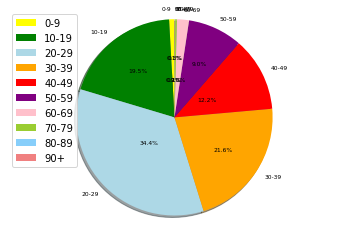

<Figure size 720x720 with 0 Axes>

In [117]:
#create pie chart with 

colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
total= cle2017_crime_age_df['Row_Total']
labels= cle2017_crime_age_df['Age Groups']
explode = (0,0,0,0,0,0,0,0,0,0)
w,l,p = plt.pie(total, explode= explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90, textprops={'fontsize':6}, pctdistance=.75)
plt.axis("equal")
plt.legend(loc="best")
#plt.legend(pie[0],labels, bbox_to_anchor=(0,0), loc="upper-left", 
                          #bbox_transform=plt.gcf().transFigure)
#plt.subplots_adjust(left=0.0, bottom=0.0, right=0.1, top=.10)

pctdists = [.5, .8, .5, .8,.5, .8, .5, .8,.5, .8]

for t,d in zip(p, pctdists):
    xi,yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))


plt.figure(figsize=(10,10))
plt.show()

In [89]:
# Change rows and columns to more easily develop graphs
Graph_race = pd.DataFrame.transpose(race_data_df)
Graph_race = Graph_race.drop(['Crimes'])
Graph_race

,0,1,2,3,4,5,6,7,8,9
Asian Count,16,16,0,2,6,8,0,1,5,10
Black Count,3986,4936,46,342,2088,1510,42,617,1356,2921
American Indian Count,3,5,0,0,0,3,0,1,0,4
White Count,708,1849,2,120,252,334,26,164,463,1196
Unknown Race,408,2824,10,31,190,177,12,133,1015,1664


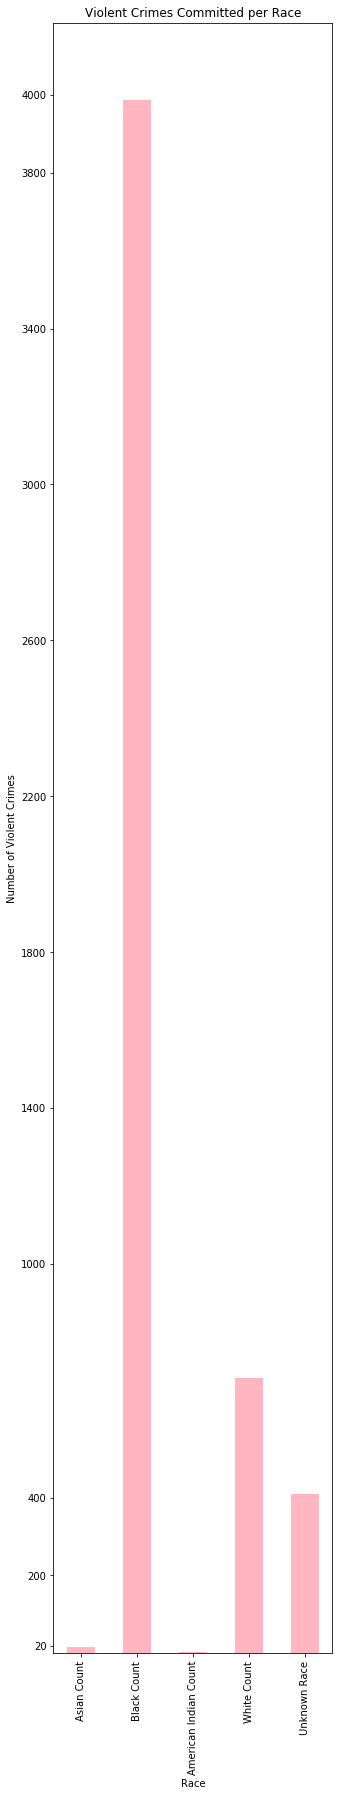

In [90]:
# Creaate violent crime bar graph - Race
violent_crime = Graph_race.loc[:,0]

# Set x and y values
y_axis = [Graph_race.loc[:,0]]
x_axis = Graph_race.index

# Set ticks
ticks = 20, 200, 400, 1000, 1400, 1800, 2200, 2600, 3000, 3400, 3800, 4000
plt.yticks(ticks=ticks, labels=None)

# Set type
violent_crime.plot(kind='bar', facecolor='lightpink', figsize=(5,30
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Violent Crimes')
plt.title('Violent Crimes Committed per Race')
plt.show()

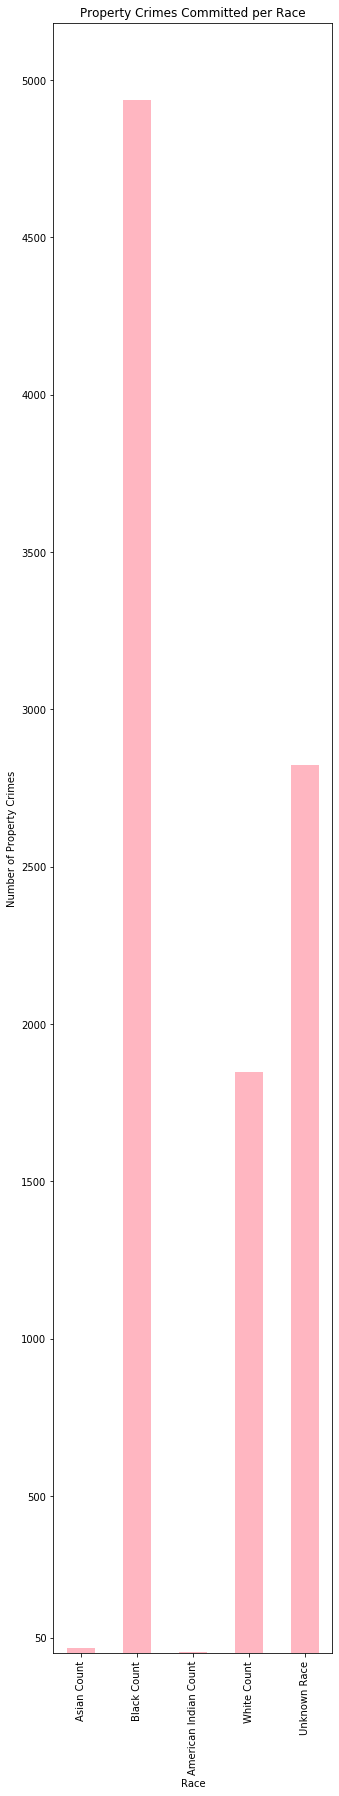

In [91]:
# Creaate property crime bar graph - Race
property_crime = Graph_race.loc[:,1]

# Set x and y values
y_axis = [Graph_race.loc[:,1]]
x_axis = Graph_race.index

# Set ticks
ticks = 50, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000
plt.yticks(ticks=ticks, labels=None)

# Set type
property_crime.plot(kind='bar', facecolor='lightpink', figsize=(5,30
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Property Crimes')
plt.title('Property Crimes Committed per Race')
plt.show()

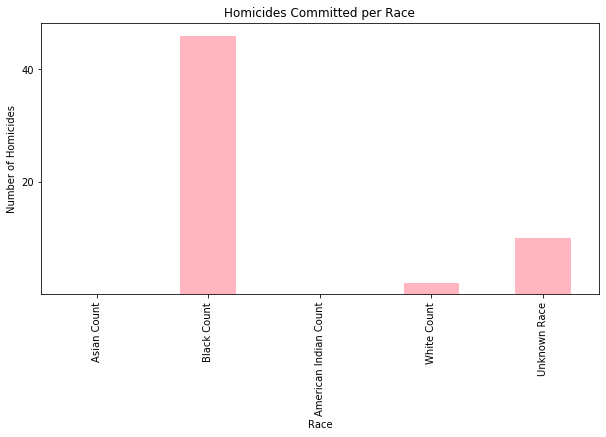

In [92]:
# Creaate homicide bar graph - Race
homicide_crime = Graph_race.loc[:,2]

# Set x and y values
y_axis = [Graph_race.loc[:,2]]
x_axis = Graph_race.index

# Set ticks
ticks = 20, 40, 60, 80
plt.yticks(ticks=ticks, labels=None)

# Set type
homicide_crime.plot(kind='bar', facecolor='lightpink', figsize=(10,5
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Homicides')
plt.title('Homicides Committed per Race')
plt.show()

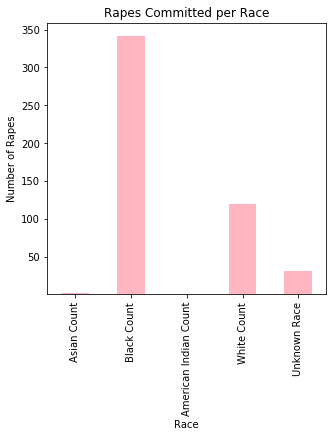

In [93]:
# Create rape bar graph - Race
Rape_crime = Graph_race.loc[:,3]

# Set x and y values
y_axis = [Graph_race.loc[:,3]]
x_axis = Graph_race.index

# Set ticks
ticks = 50, 100, 150, 200, 250, 300, 350, 400
plt.yticks(ticks=ticks, labels=None)

# Set type
Rape_crime.plot(kind='bar', facecolor='lightpink', figsize=(5,5
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Rapes')
plt.title('Rapes Committed per Race')
plt.show()

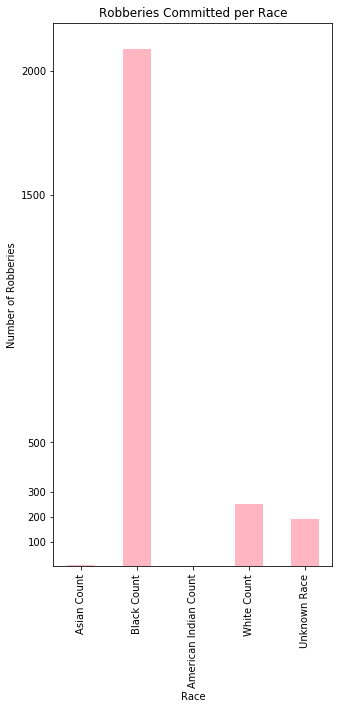

In [94]:
# Create robbery bar graph - Race
Robbery_crime = Graph_race.loc[:,4]

# Set x and y values
y_axis = [Graph_race.loc[:,4]]
x_axis = Graph_race.index

# Set ticks
ticks = 100, 200, 300, 500, 1500, 2000, 2500
plt.yticks(ticks=ticks, labels=None)

# Set type
Robbery_crime.plot(kind='bar', facecolor='lightpink', figsize=(5,10
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Robberies')
plt.title('Robberies Committed per Race')
plt.show()

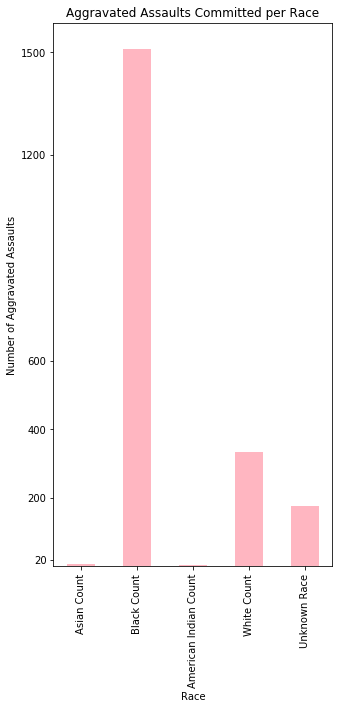

In [95]:
# Create aggravated assault bar graph - Race
aggravated_assault = Graph_race.loc[:,5]

# Set x and y values
y_axis = [Graph_race.loc[:,5]]
x_axis = Graph_race.index

# Set ticks
ticks = 20, 200, 400, 600, 1200, 1500
plt.yticks(ticks=ticks, labels=None)

# Set type
aggravated_assault.plot(kind='bar', facecolor='lightpink', figsize=(5,10
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Aggravated Assaults')
plt.title('Aggravated Assaults Committed per Race')
plt.show()

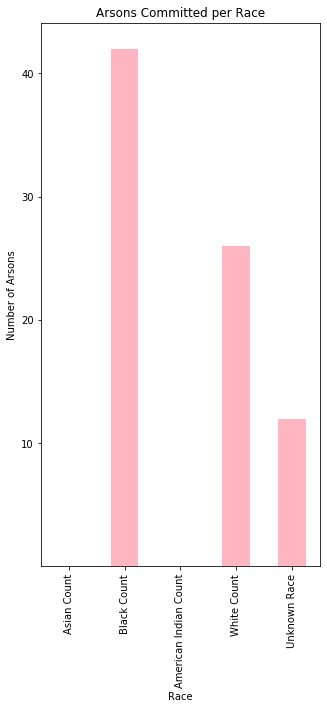

In [96]:
# Create arson bar graph - Race
arson = Graph_race.loc[:,6]

# Set x and y values
y_axis = [Graph_race.loc[:,6]]
x_axis = Graph_race.index

# Set ticks
ticks = 10, 20, 30, 40, 50
plt.yticks(ticks=ticks, labels=None)

# Set type
arson.plot(kind='bar', facecolor='lightpink', figsize=(5,10
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Arsons')
plt.title('Arsons Committed per Race')
plt.show()

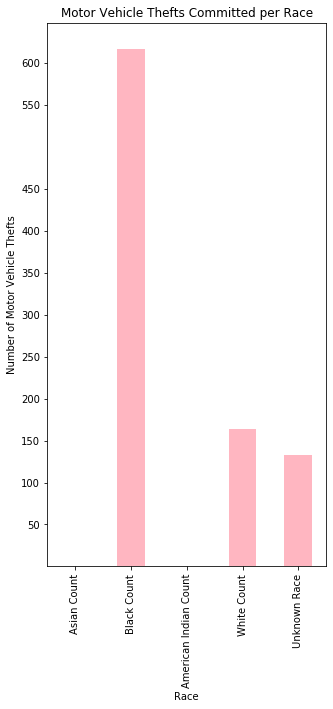

In [97]:
# Create motor vehicle theft bar graph - Race
mv_theft = Graph_race.loc[:,7]

# Set x and y values
y_axis = [Graph_race.loc[:,7]]
x_axis = Graph_race.index

# Set ticks
ticks = 50, 100, 150, 200, 250, 300, 350, 400, 450, 5000, 550, 600, 650
plt.yticks(ticks=ticks, labels=None)

# Set type
mv_theft.plot(kind='bar', facecolor='lightpink', figsize=(5,10
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Motor Vehicle Thefts')
plt.title('Motor Vehicle Thefts Committed per Race')
plt.show()

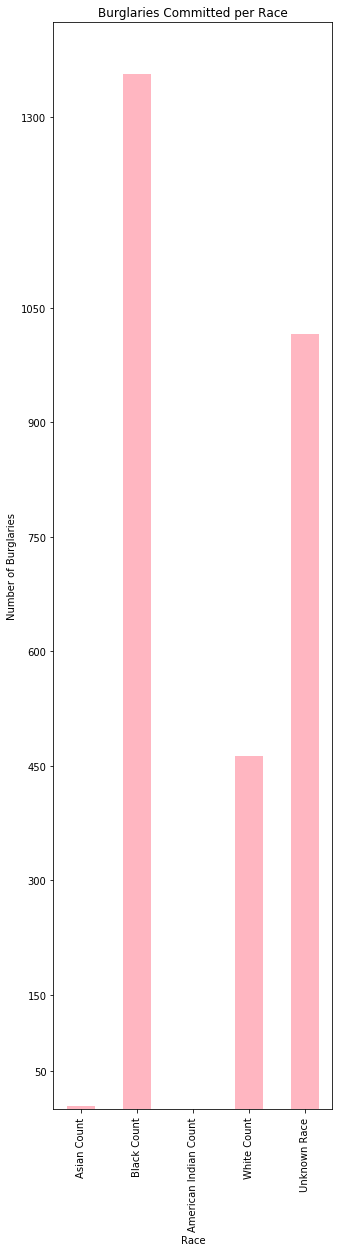

In [98]:
# Create Burglary bar graph - Race
Burglary = Graph_race.loc[:,8]

# Set x and y values
y_axis = [Graph_race.loc[:,8]]
x_axis = Graph_race.index

# Set ticks
ticks = 50, 150, 300, 450, 600, 750, 900, 1050, 1300, 
plt.yticks(ticks=ticks, labels=None)

# Set type
Burglary.plot(kind='bar', facecolor='lightpink', figsize=(5,20
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Burglaries')
plt.title('Burglaries Committed per Race')
plt.show()

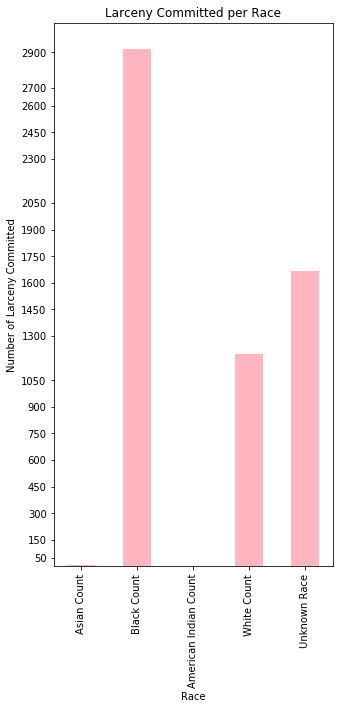

In [99]:
# Create Larceny bar graph - Race
larceny = Graph_race.loc[:,9]

# Set x and y values
y_axis = [Graph_race.loc[:,9]]
x_axis = Graph_race.index

# Set ticks
ticks = 50, 150, 300, 450, 600, 750, 900, 1050, 1300, 1450, 1600, 1750, 1900, 2050, 2300, 2450, 2600, 2700, 2900
plt.yticks(ticks=ticks, labels=None)

# Set type
larceny.plot(kind='bar', facecolor='lightpink', figsize=(5,10
))

# Format
plt.xlabel('Race')
plt.ylabel('Number of Larceny Committed')
plt.title('Larceny Committed per Race')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

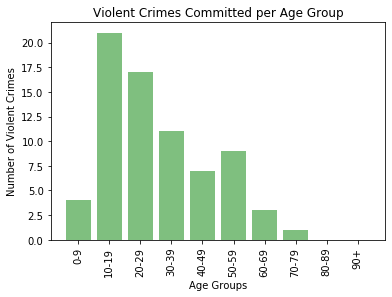

In [100]:
# Create bar graph for violent crime - age

# Axes
violent = [4, 21, 17, 11, 7, 9, 3, 1, 0, 0]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]


# Graph Format
plt.bar(x_axis, violent, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Violent Crimes')
plt.title('Violent Crimes Committed per Age Group')
plt.xticks(rotation='vertical')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

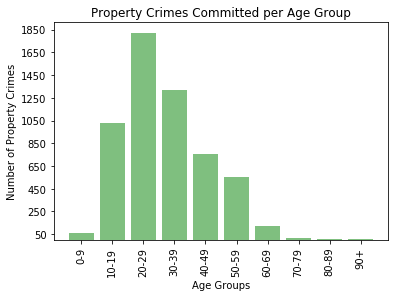

In [101]:
# Create bar graph for property crime - age

# Axes
property = [58, 1025, 1823, 1315, 753, 553, 121, 13, 3, 3]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Set ticks
ticks = 50, 250, 450, 650, 850, 1050, 1250, 1450, 1650, 1850 
plt.yticks(ticks=ticks, labels=None)

# Graph Format
plt.bar(x_axis, property, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Property Crimes')
plt.title('Property Crimes Committed per Age Group')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

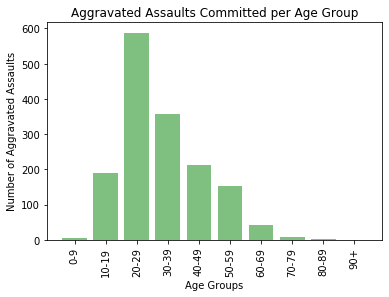

In [102]:
# Create bar graph for assault crime - age

# Axes
assault = [5, 189, 588, 358, 211, 154, 43, 9, 1, 0]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Graph Format
plt.bar(x_axis, assault, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Aggravated Assaults')
plt.title('Aggravated Assaults Committed per Age Group')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

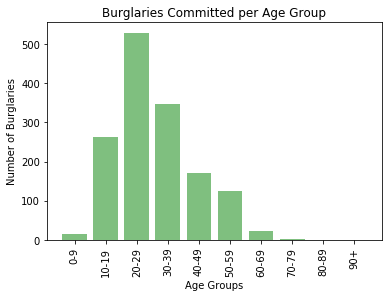

In [103]:
# Create bar graph for burglary crime - age

# Axes
burglary_age = [14, 263, 529, 348, 171, 125, 23, 3, 0, 0]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Graph Format
plt.bar(x_axis, burglary_age, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Burglaries')
plt.title('Burglaries Committed per Age Group')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

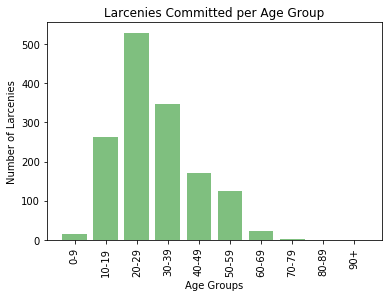

In [104]:
# Create bar graph for larceny crime - age

# Axes
larceny_age = [39, 547, 1057, 797, 526, 381, 92, 8, 2, 3]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Graph Format
plt.bar(x_axis, burglary_age, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Larcenies')
plt.title('Larcenies Committed per Age Group')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

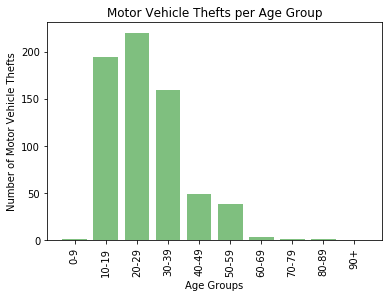

In [105]:
# Create bar graph for motor vehicle theft - age

# Axes
mvt_age = [1, 194, 220, 159, 49, 38, 3, 1, 1, 0]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Graph Format
plt.bar(x_axis, mvt_age, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Motor Vehicle Thefts')
plt.title('Motor Vehicle Thefts per Age Group')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

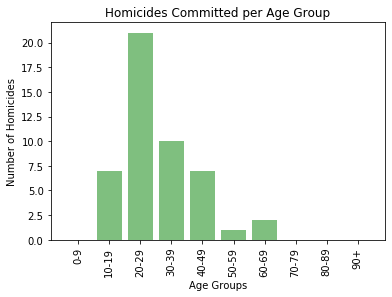

In [106]:
# Create bar graph for Homicide - age

# Axes
homicide_age = [0, 7, 21, 10, 7, 1, 2, 0, 0, 0]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Graph Format
plt.bar(x_axis, homicide_age, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Homicides')
plt.title('Homicides Committed per Age Group')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

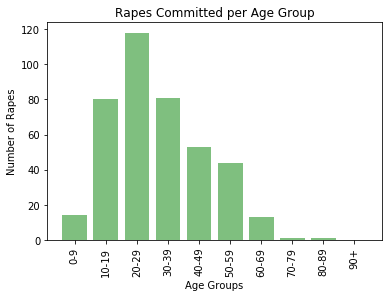

In [107]:
# Create bar graph for Rape - age

# Axes
rape_age = [14, 80, 118, 81, 53, 44, 13, 1, 1, 0]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Graph Format
plt.bar(x_axis, rape_age, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Rapes')
plt.title('Rapes Committed per Age Group')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

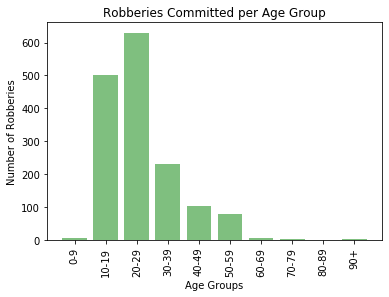

In [108]:
# Create bar graph for Robbery - age

# Axes
robbery_age = [4, 500, 630, 231, 104, 79, 5, 3, 0, 2]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Graph Format
plt.bar(x_axis, robbery_age, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Robberies')
plt.title('Robberies Committed per Age Group')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

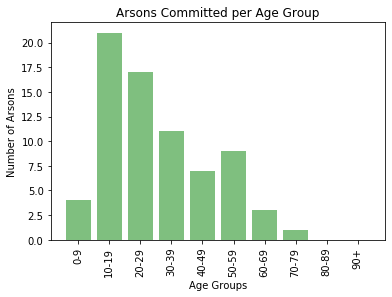

In [109]:
# Create bar graph for arson - age

# Axes
arson_age = [4, 21, 17, 11, 7, 9, 3, 1, 0, 0]
x_axis = cle2017_crime_age_df['Age Groups']
tick_locations = [value for value in x_axis]

# Graph Format
plt.bar(x_axis, arson_age, color='green', alpha=0.5, align="center")
plt.xlabel('Age Groups')
plt.ylabel('Number of Arsons')
plt.title('Arsons Committed per Age Group')
plt.xticks(rotation='vertical')